# Lab #11: Image Analysis in Frequency Domain - Summary Notes

# Objective:
# Learn and apply Fourier Transform on images to analyze and manipulate them in frequency domain.

# Theory:
# - Any function (including images) can be represented as sum/integral of sine and cosine waves of different frequencies.
# - Discrete Fourier Transform (DFT) converts an image from spatial domain to frequency domain.
# - Inverse DFT recovers the original image from the frequency domain.
# - Filtering in frequency domain:
#    1. Compute DFT of image -> F(u,v)
#    2. Multiply F(u,v) by filter H(u,v)
#    3. Compute inverse DFT to get filtered image

# Steps for frequency domain processing:
# 1. Take Fourier Transform of image
# 2. Shift DC component (zero frequency) to image center
# 3. Take absolute value (magnitude)
# 4. Use log transform to brighten image for visualization
# 5. Normalize image for high contrast display (0-255 scale)

# Useful Python commands (using numpy and OpenCV):
# ---------------------------------------------------------
import numpy as np
import cv2

# Fourier Transform:
# my_transformed_image = np.fft.fft2(my_image)

# Inverse Fourier Transform:
# my_inverse_image = np.fft.ifft2(my_image)

# Shift zero frequency component to center:
# my_shifted_image = np.fft.fftshift(my_transformed_image)

# Shift back:
# my_inverse_shifted_image = np.fft.ifftshift(my_shifted_image)

# Magnitude (absolute value):
# my_magnitude = np.abs(my_image)

# Log transform:
# my_log_image = np.log(my_image + 1)  # add 1 to avoid log(0)

# Point-wise multiplication of two matrices:
# my_result = np.multiply(my_image, my_filter)

# Normalize image to 0-255 (8-bit grayscale):
# normalized_img = cv2.normalize(src, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

# Lab Tasks:
# 1. Compute DFT of Fig01.tif manually and using built-in functions, and compare results.
#    Use formula: F(x,y) * (-1)^(x+y) to center spectrum.
#
# 2. Create ideal low pass and high pass filters based on distance from center.
#    Apply these filters to DFT of Fig01.tif, then inverse transform and display results.
#
# 3. Apply spatial domain filters in frequency domain:
#    - Create a 9x9 Gaussian filter in spatial domain.
#    - Resize image and filter to (ImageSize + FilterSize - 1).
#    - Convert both to frequency domain, multiply, and invert back.
#    - Display Gaussian filter in frequency domain and filtered image.
#
# Home Task:
# Use frequency domain techniques (notch filter) to remove periodic noise from an image.

# Conclusion:
# This lab helps understand Fourier transform basics and how to apply frequency domain filtering for image enhancement.


In [3]:
import numpy as np
import pandas as pd
import cv2
from math import pi
import matplotlib.pyplot as plt
from numpy.random.c_distributions import random_f


Text(0.5, 1.0, 'Phase Spectrum')

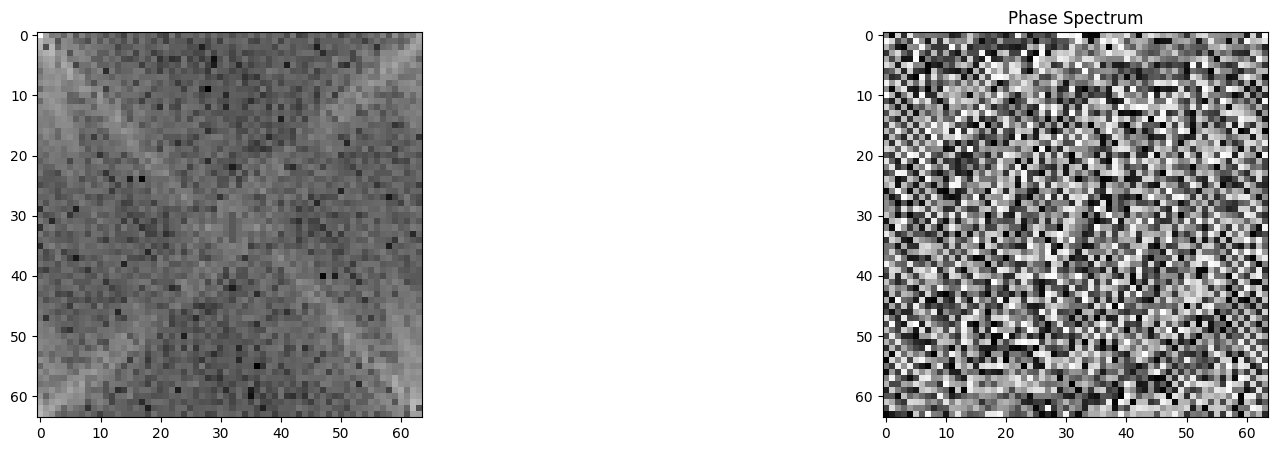

In [50]:
def transform(img):
    x,y = img.shape
    new_img = np.zeros((x,y), dtype=np.float32)
    for i in range(x):
        for j in range(y):
            new_img[i,j] = img[i,j]*(-1)**(x+y)
    return new_img

def center_img(img):
    img = img.astype(np.float32)
    x = np.arange(img.shape[0]).reshape(-1, 1)
    y = np.arange(img.shape[1])
    checkerboard = (-1) ** (x + y)
    return img * checkerboard
def fourier_transform(img1):
    img2 = center_img(img1)
    img = cv2.resize(img2, (64, 64))
    m, n = img.shape
    fourier = np.zeros((m, n), dtype=np.complex128)
    for u in range(m):
        for v in range(n):
            sum_val = 0
            for x in range(m):
                for y in range(n):
                    sum_val += img[x, y] * np.exp(-2j * pi * ((u * x) / m + (v * y) / n))
            fourier[u, v] = sum_val
    return fourier

img = cv2.imread("Fig01 (1).tif", 0)
f_transform = fourier_transform(img)
magnitude_spectrum = np.log(1 + np.abs(f_transform))
phase_spectrum = np.angle(f_transform)


fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
ax[1].imshow(phase_spectrum, cmap='gray')
plt.title("Phase Spectrum")


Text(0.5, 1.0, 'Magnitude Spectrum')

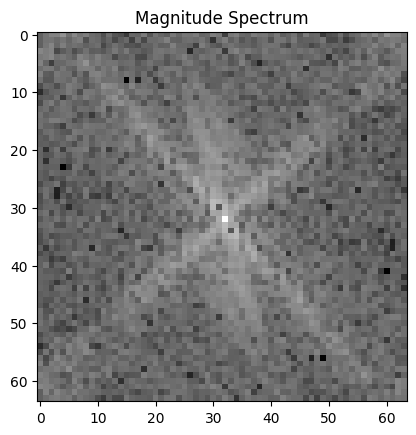

In [49]:
img1 = cv2.imread("Fig01 (1).tif", 0)


img1 = cv2.resize(img1, (64, 64))
img1 = center_img(img1)
forier_img = np.fft.fft2(img1)

magnitude_spectrum1 = np.log(1 + np.abs(forier_img))
normalize = cv2.normalize(magnitude_spectrum1, None,0, 255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)

plt.imshow(normalize, cmap='gray')
plt.title("Magnitude Spectrum")


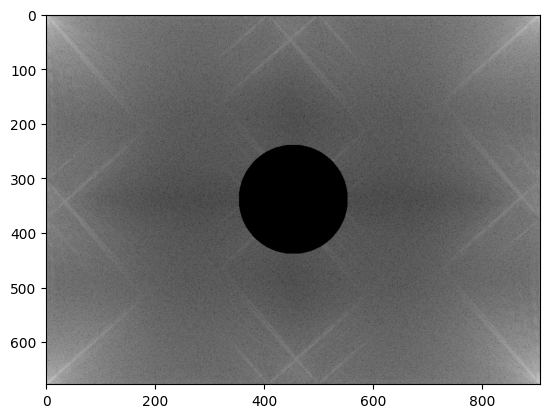

In [61]:
def lpf(img, radius):
    m, n = img.shape
    centre_m, centre_n = m//2, n//2
    filter = np.zeros((m, n), dtype=np.float32)
    for i in range(m):
        for j in range(n):
            dist = np.sqrt((i - centre_m)**2 + (j - centre_n)**2)
            if dist >= radius:
                filter[i,j] = img[i,j]
            else:
                filter[i,j] = 0


    return img*filter
def hpf(img, radius):
    m, n = img.shape
    centre_m, centre_n = m//2, n//2
    filter = np.zeros((m, n), dtype=np.float32)
    for i in range(m):
        for j in range(n):
            dist = np.sqrt((i - centre_m)**2 + (j - centre_n)**2)
            if dist >= radius:
                filter[i,j] = img[i,j]
            else:
                filter[i,j] = 0


    return img*filter

img = cv2.imread("Fig01 (1).tif", 0)
fft_im = np.fft.fft2(img)
magnitude_spectrum = np.abs(fft_im)
imglp = hpf(magnitude_spectrum, 100)
img_log = np.log(1 + np.abs(imglp))
plt.imshow(img_log, cmap='gray')

Text(0.5, 1.0, 'hpf')

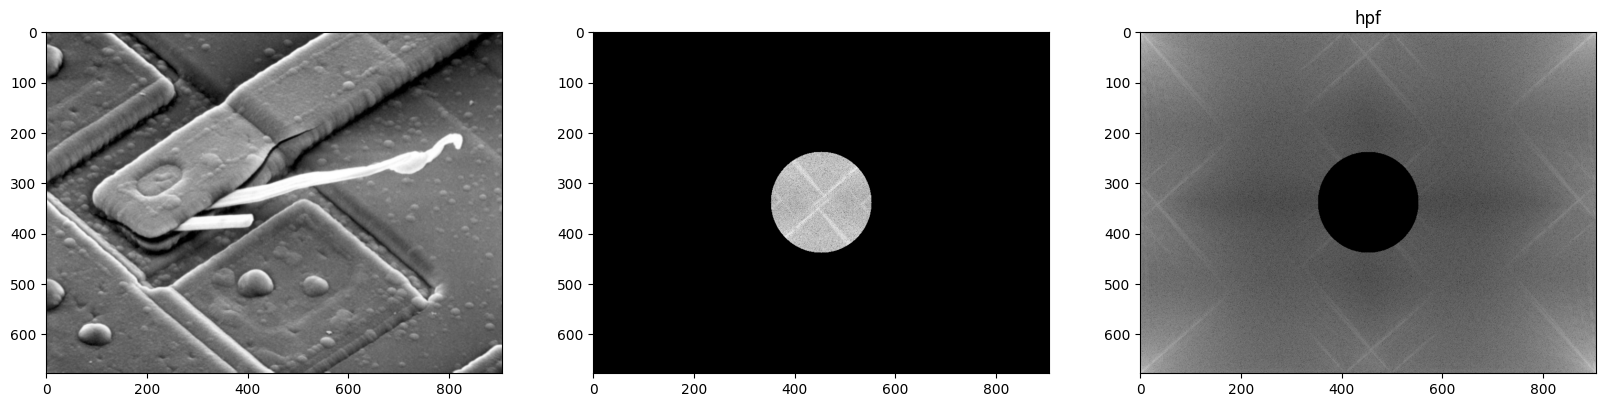

In [81]:
def hpf(img, radius):
    m, n = img.shape
    centre_m, centre_n = m//2, n//2
    filter = np.zeros((m, n), dtype=np.float32)
    for i in range(m):
        for j in range(n):
            dist = np.sqrt((i - centre_m)**2 + (j - centre_n)**2)
            if dist >= radius:
                filter[i,j] = img[i,j]
            else:
                filter[i,j] = 0


    return img*filter

    return img*filter
def lpf(img, radius):
    m, n = img.shape
    centre_m, centre_n = m//2, n//2
    filter = np.zeros((m, n), dtype=np.float32)
    for i in range(m):
        for j in range(n):
            dist = np.sqrt((i - centre_m)**2 + (j - centre_n)**2)
            if dist <= radius:
                filter[i,j] = img[i,j]
            else:
                filter[i,j] = 0


    return img*filter

img = cv2.imread("Fig01 (1).tif", 0)
fft_im = np.fft.fft2(img)
magnitude_spectrum = np.abs(fft_im)

imglp = lpf(magnitude_spectrum, 100)
img_log_l = np.log(1 + np.abs(imglp))
rect_img1 = np.fft.ifft2(img_log_l)

imghp = hpf(magnitude_spectrum, 100)
img_log_h = np.log(1 + np.abs(imghp))


fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(img, cmap='gray')
plt.title("Original Image")
ax[1].imshow(img_log_l, cmap='gray')
plt.title("lpf")
ax[2].imshow(img_log_h, cmap='gray')
plt.title("hpf")

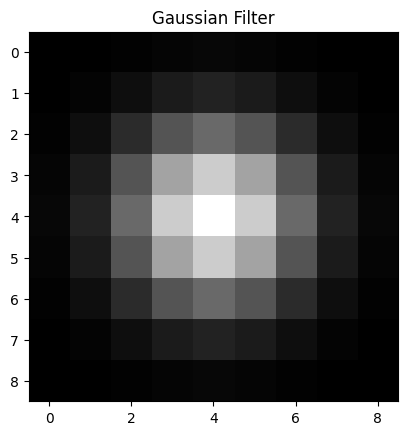

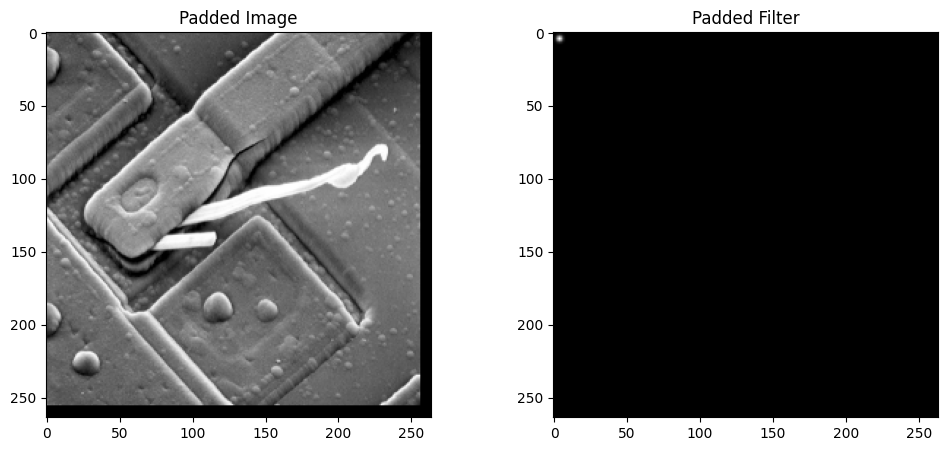

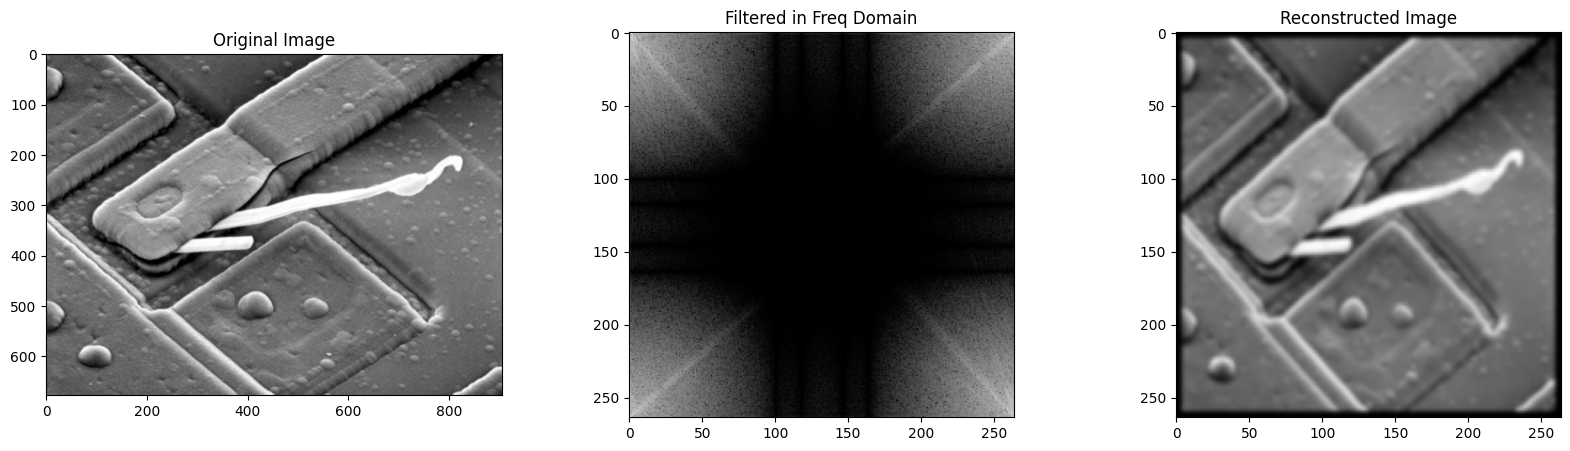

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def gaussian_filter(size, sigma):
    gaussian = np.zeros((size, size), dtype=float)
    center = size // 2
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            gaussian[i, j] = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    return gaussian

def freq_filter(img, filter):
    img = cv2.resize(img, (256, 256))
    m_img, n_img = img.shape
    m_f, n_f = filter.shape
    m_op, n_op = m_f + m_img - 1, n_f + n_img - 1

    img_pad = np.pad(img, ((0, m_op - m_img), (0, n_op - n_img)), mode='constant', constant_values=0)
    filter_pad = np.pad(filter, ((0, m_op - m_f), (0, n_op - n_f)), mode='constant', constant_values=0)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].imshow(img_pad, cmap='gray')
    ax[0].set_title("Padded Image")
    ax[1].imshow(filter_pad, cmap='gray')
    ax[1].set_title("Padded Filter")

    fil_fft = np.fft.fft2(filter_pad)
    img_fft = np.fft.fft2(img_pad)

    return fil_fft * img_fft


img = cv2.imread('Fig01 (1).tif', 0)

filter = gaussian_filter(9, sigma=1.5)
plt.imshow(filter, cmap='gray')
plt.title("Gaussian Filter")
plt.show()

filter_img = freq_filter(img, filter)
re_const = np.fft.ifft2(filter_img)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(np.log(np.abs(filter_img) + 1), cmap='gray')
ax[1].set_title("Filtered in Freq Domain")
ax[2].imshow(np.abs(re_const), cmap='gray')
ax[2].set_title("Reconstructed Image")
plt.show()
